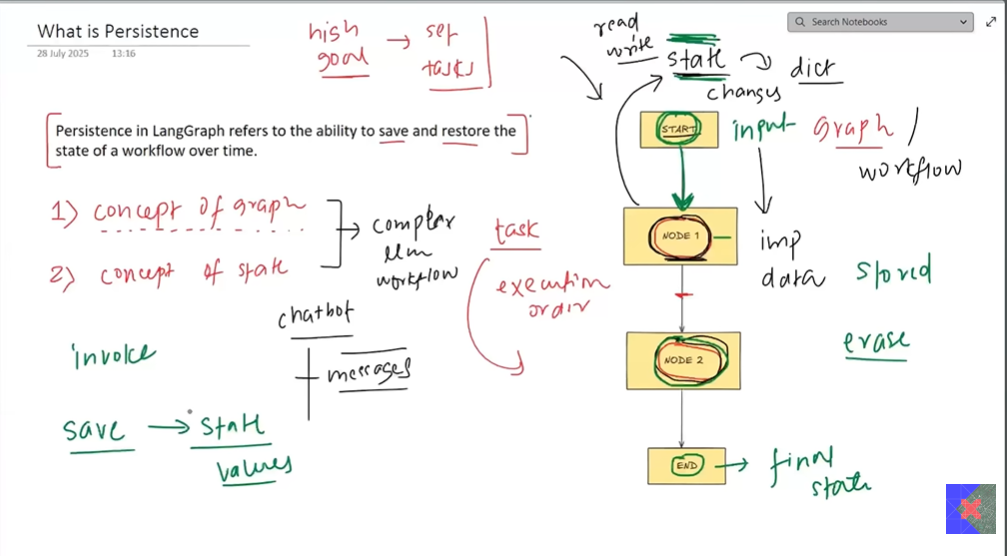

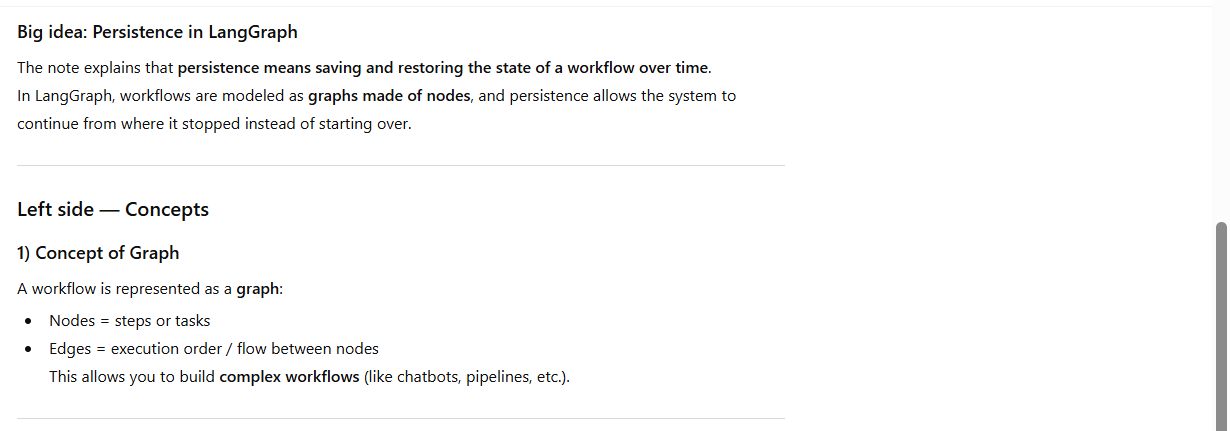

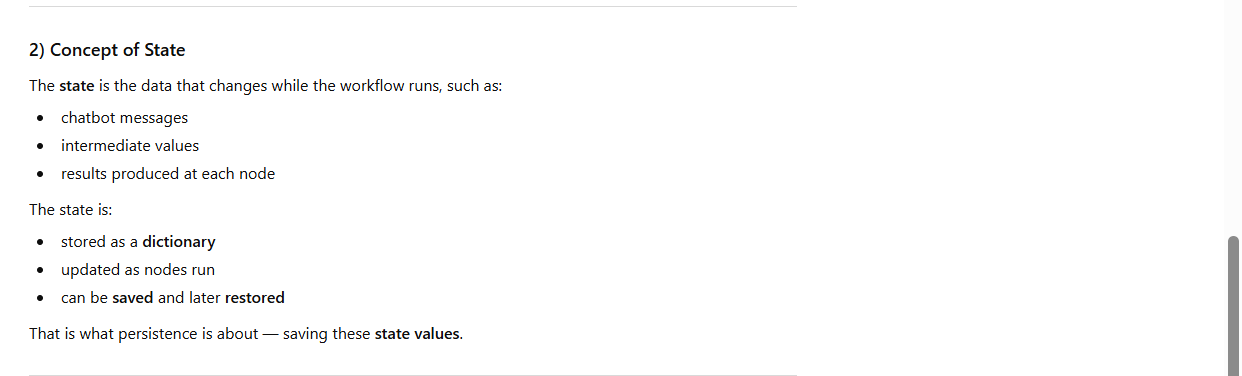

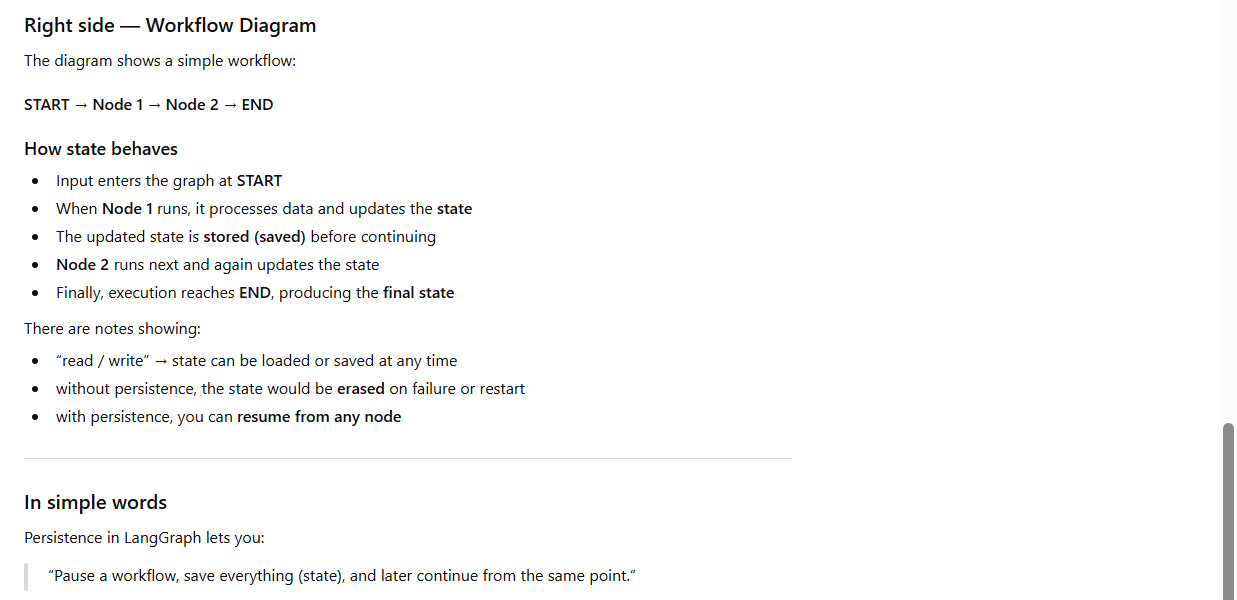

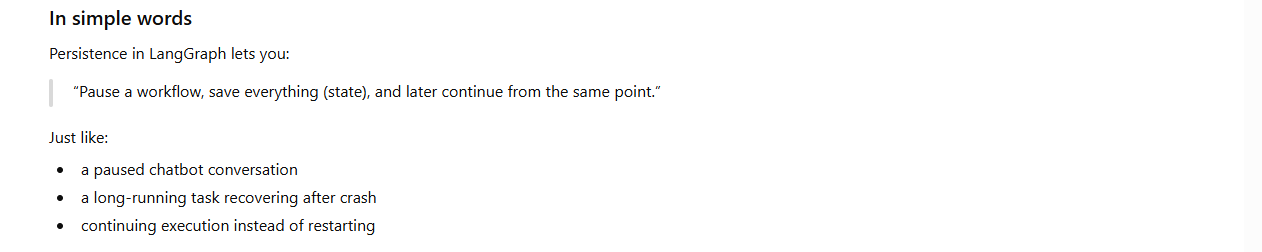

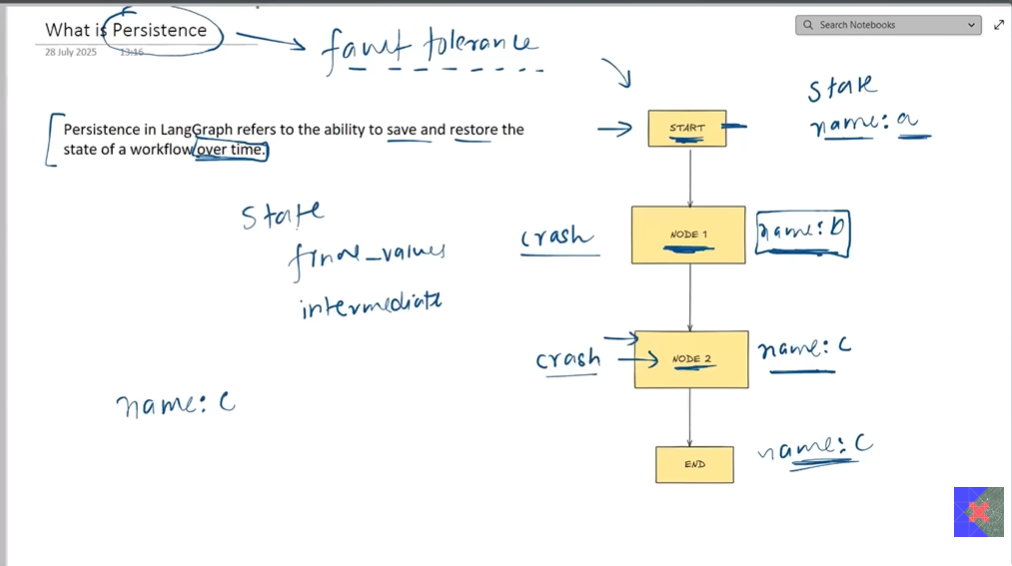

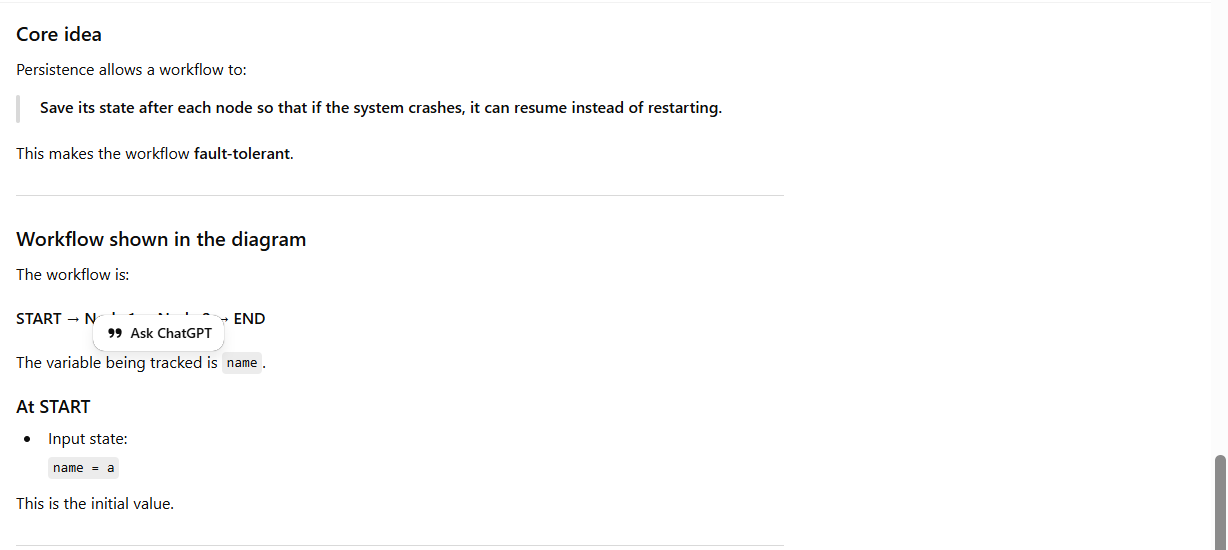

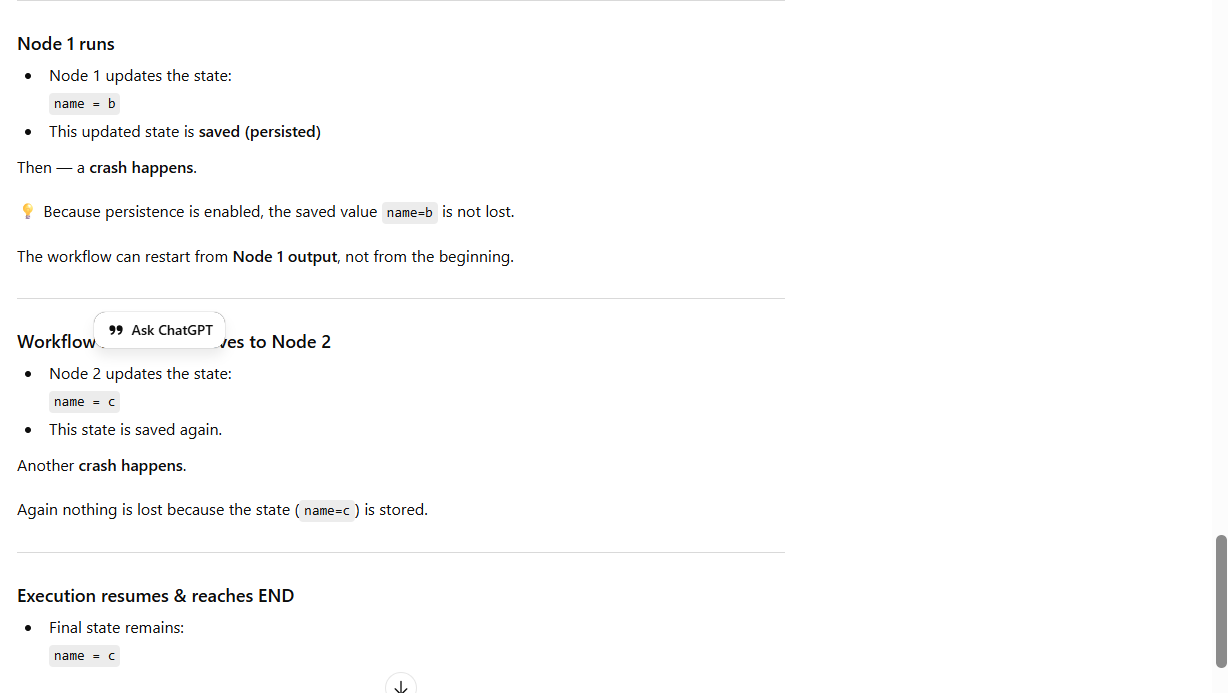

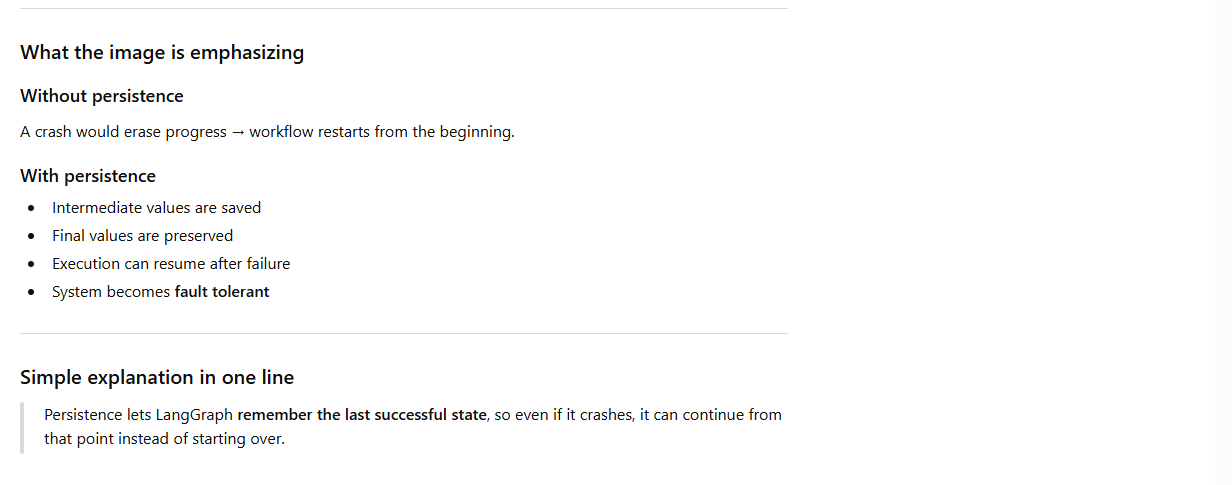

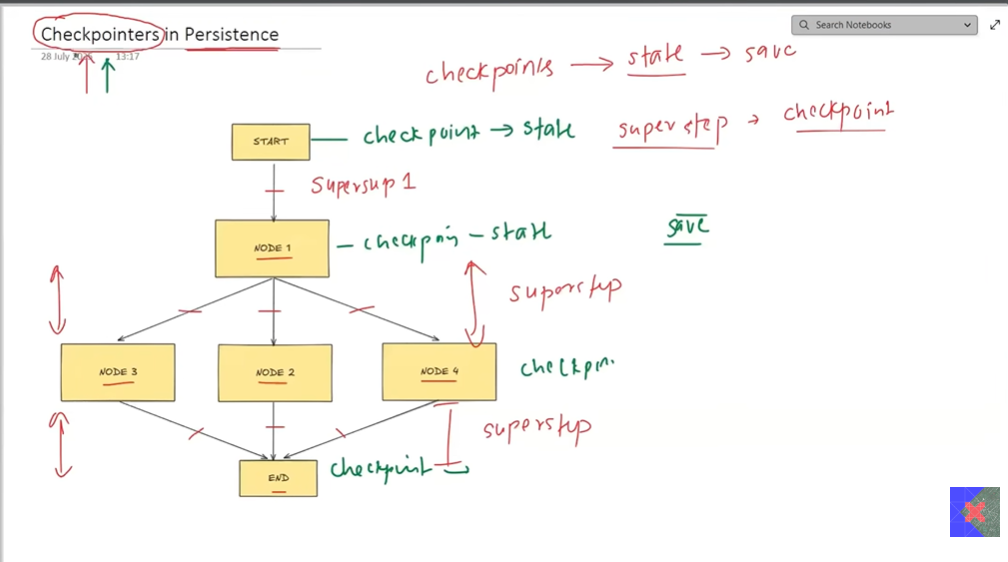

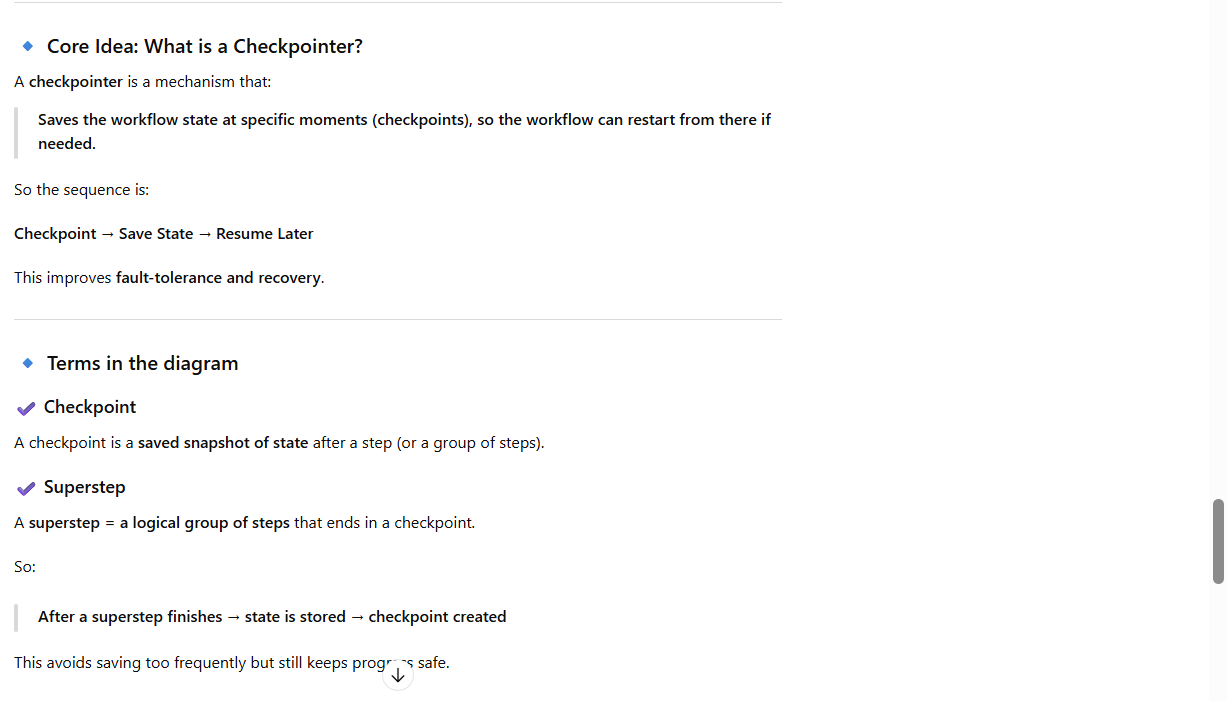

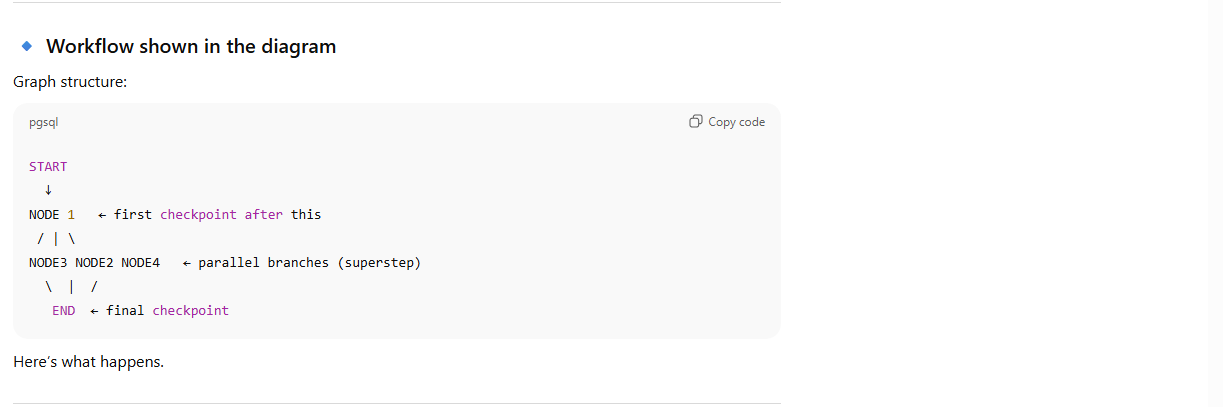

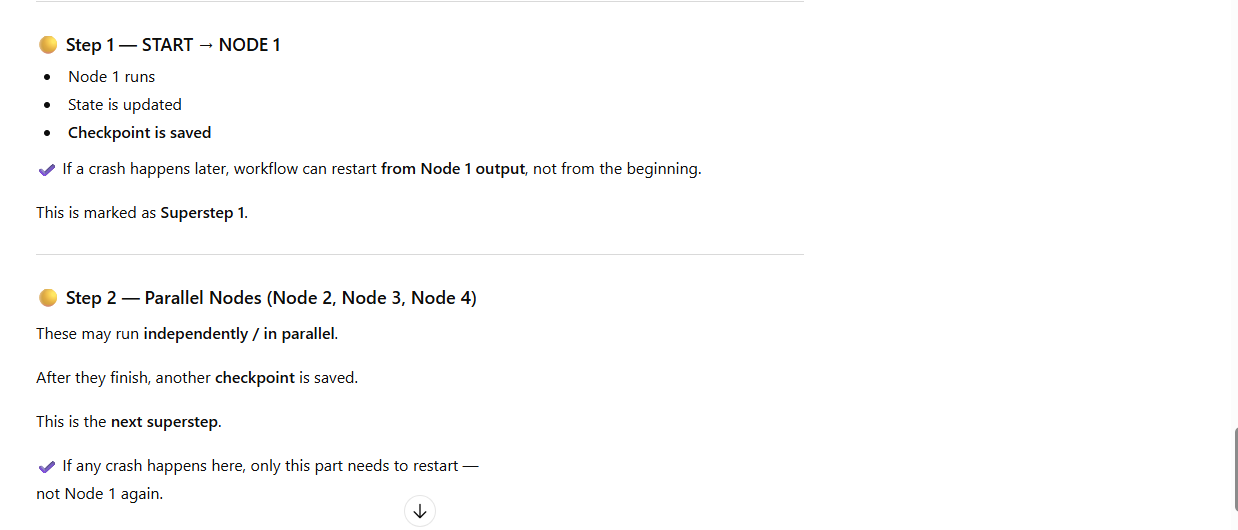

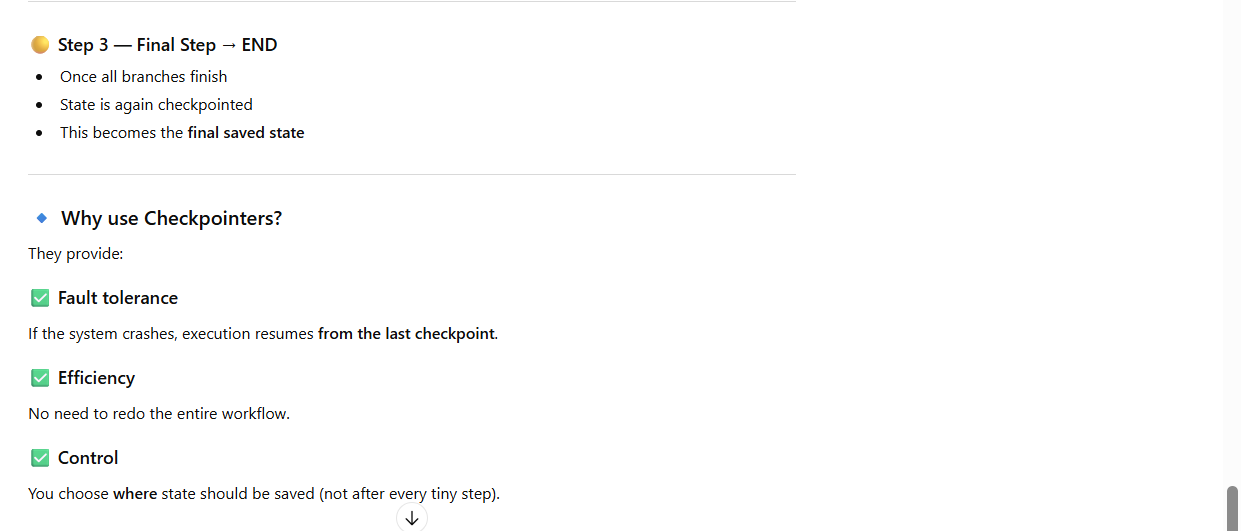

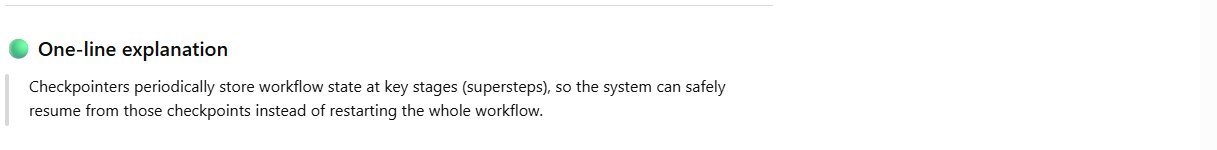

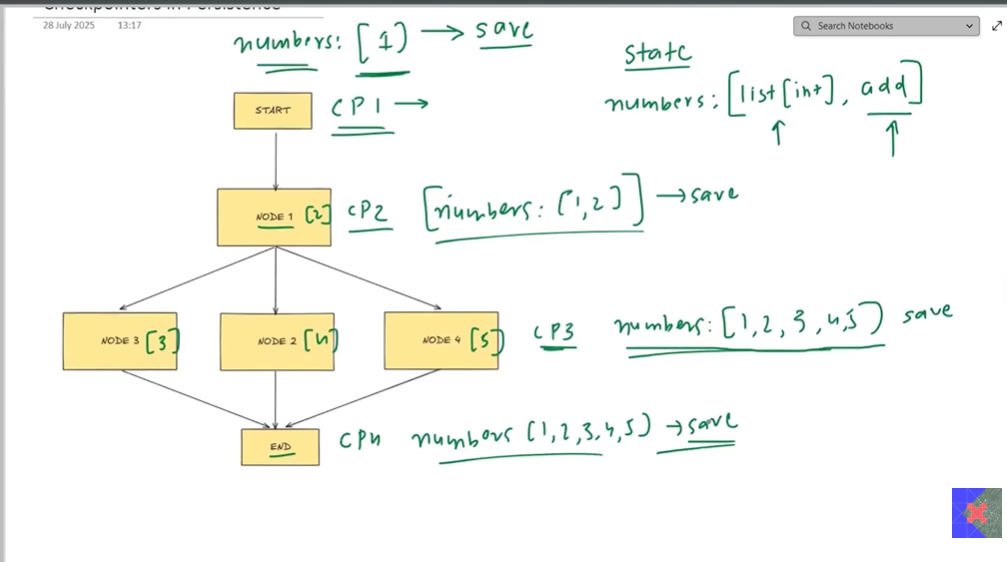

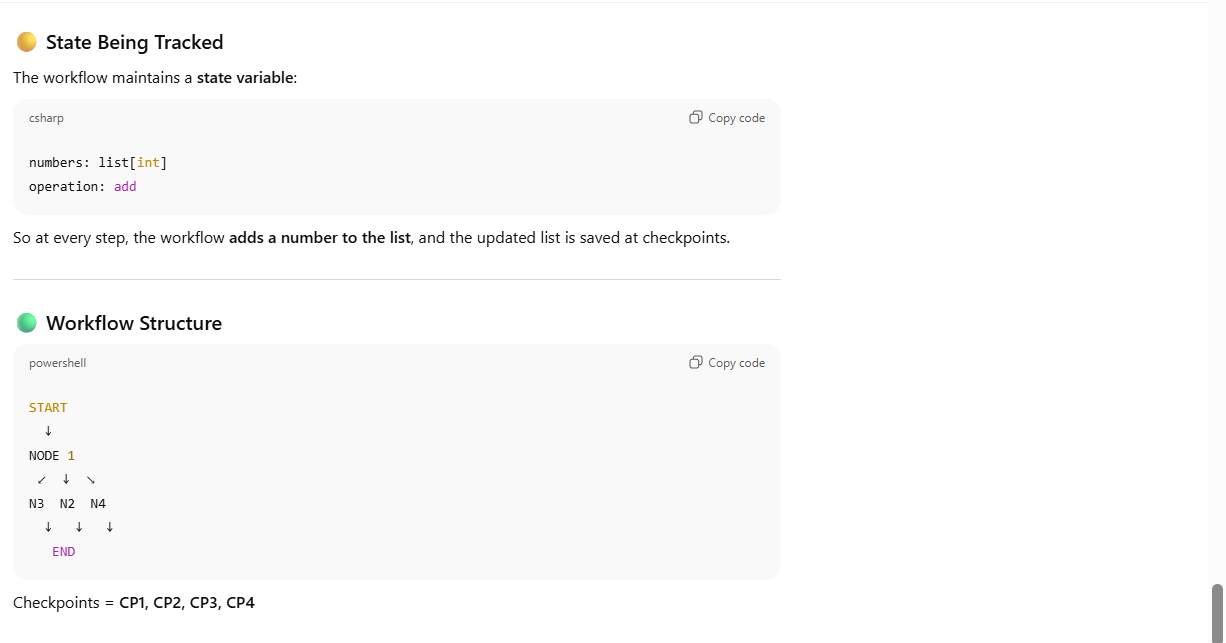

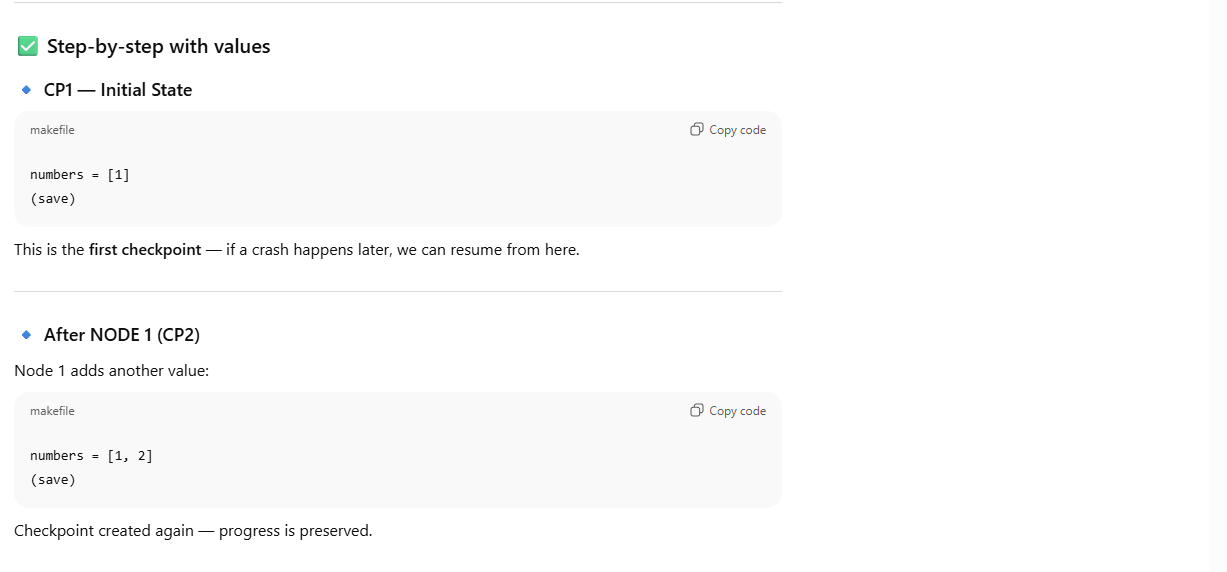

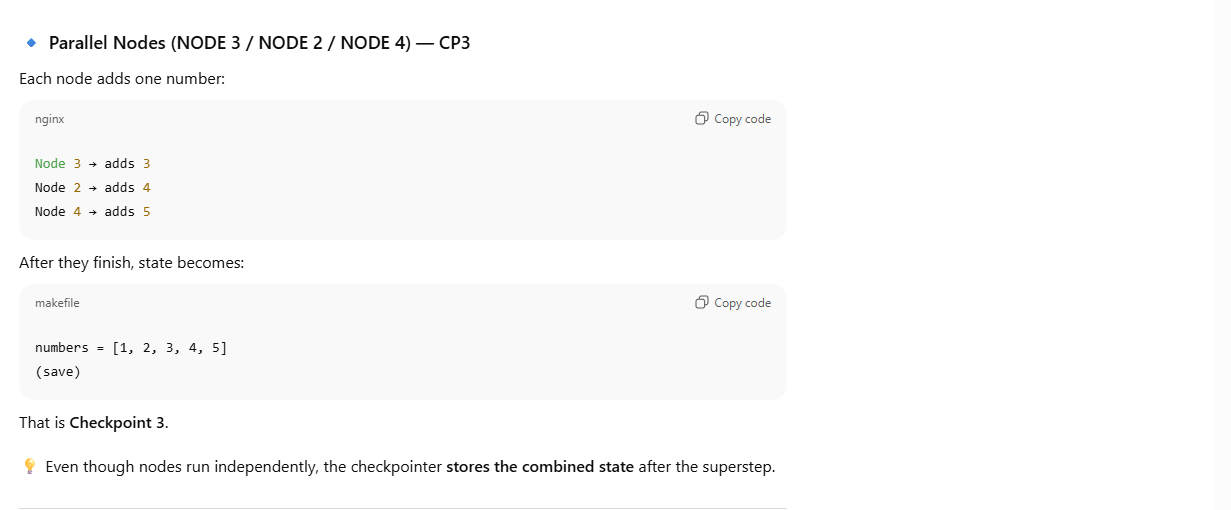

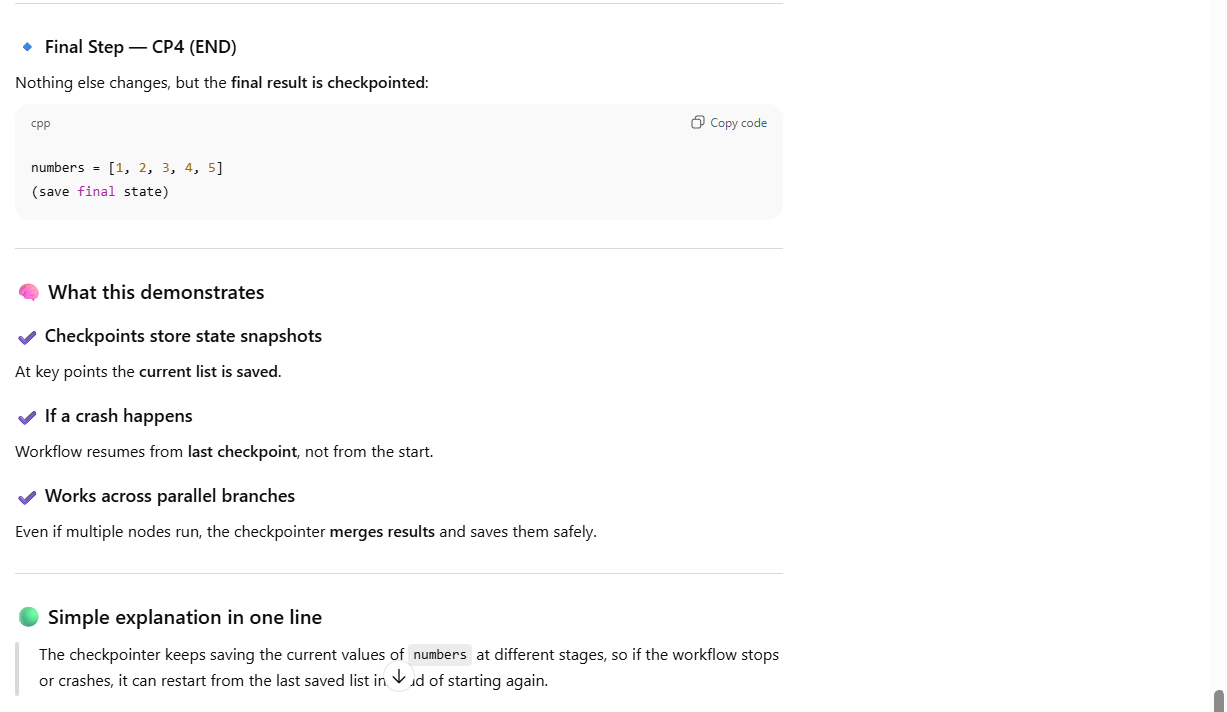

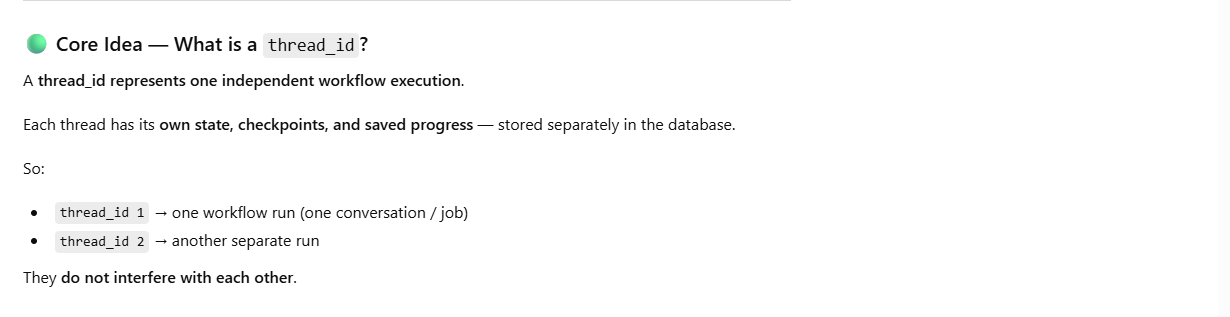

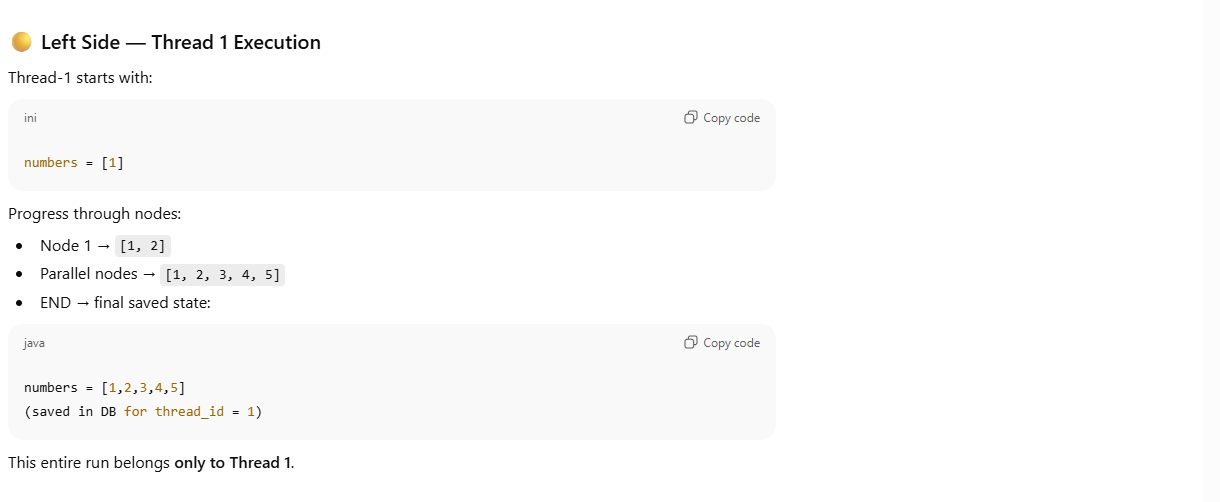

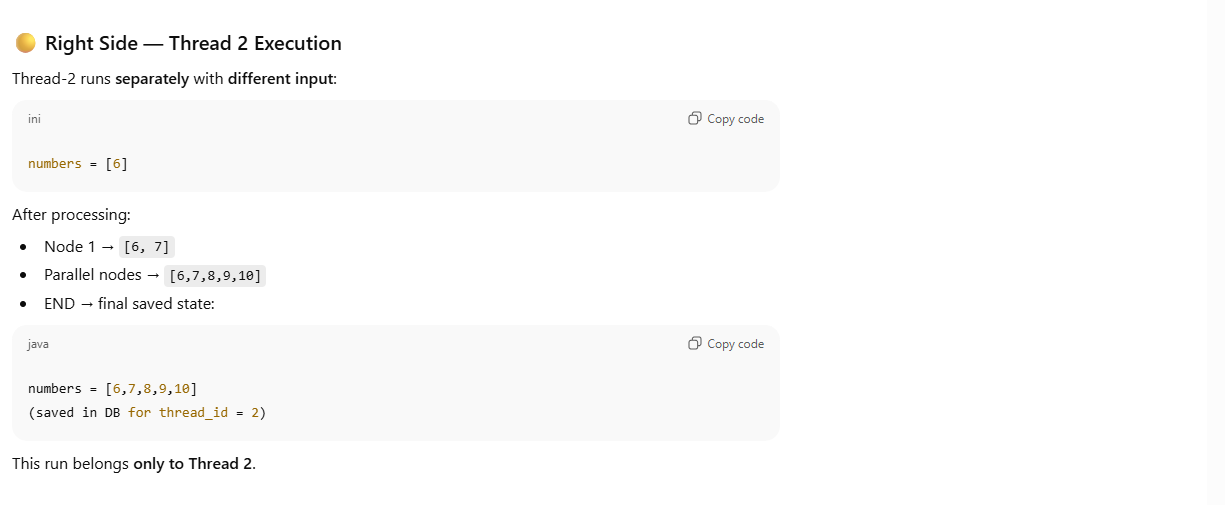

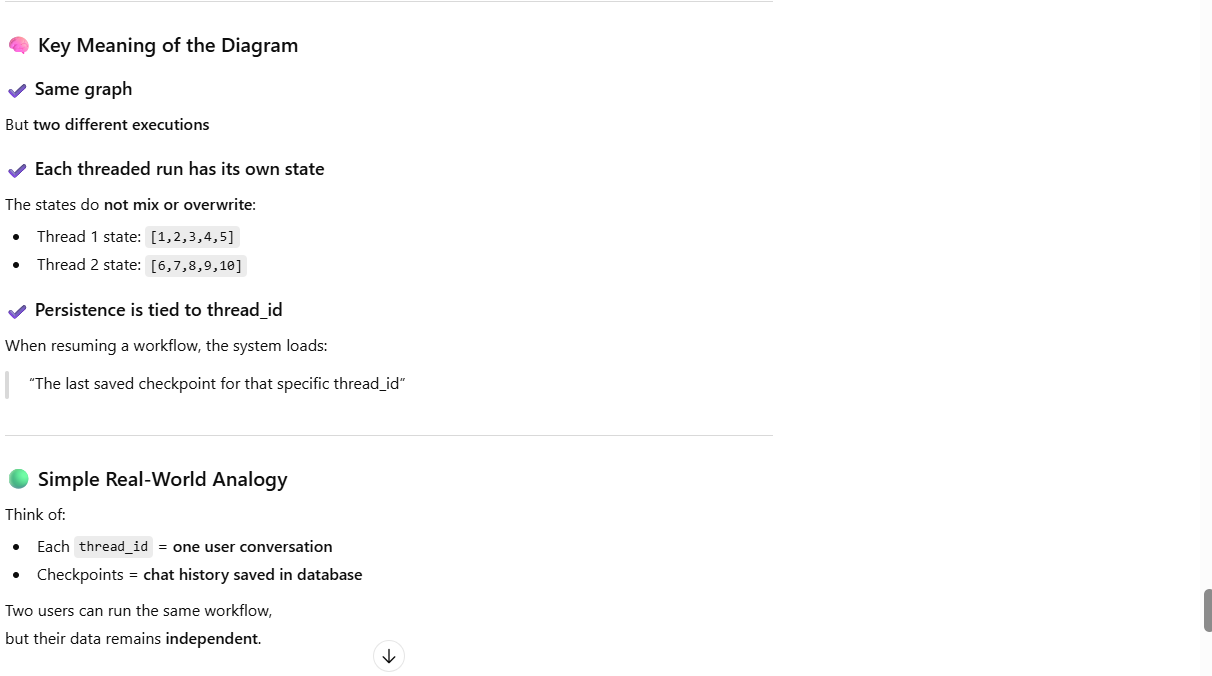

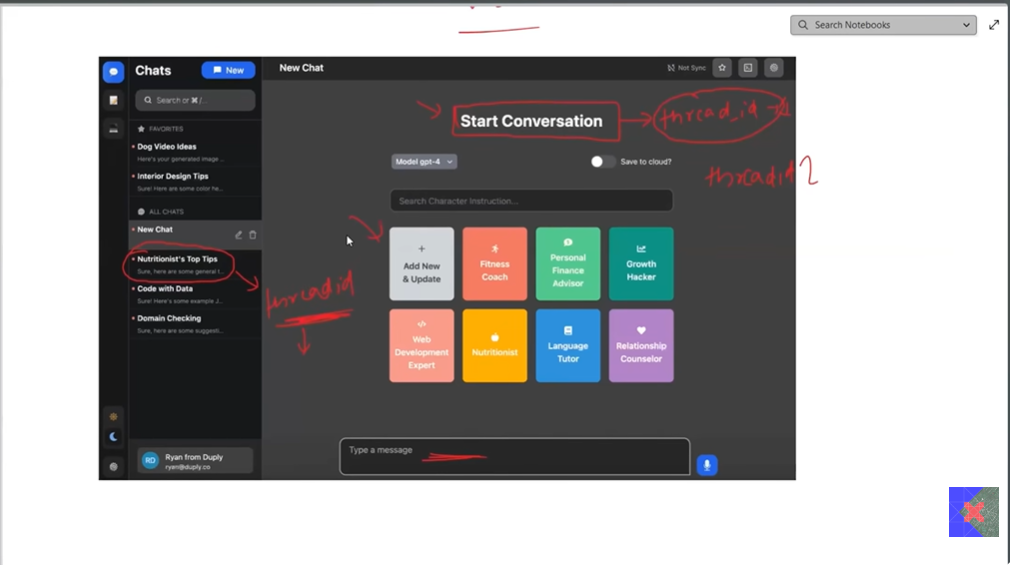

In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
load_dotenv()

llm = ChatOpenAI()

In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [5]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [6]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [7]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

In [8]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't handle the pressure!",
 'explanation': 'This joke plays on the idea of a slice of pizza seeking therapy because it is feeling overwhelmed by the number of toppings it has. Toppings add weight and pressure to the slice, making it unable to handle the stress. The punchline is a play on words, using "handle the pressure" in both a literal sense (the weight of the toppings) and a figurative sense (the stress and anxiety the slice feels). It\'s a light-hearted and playful way to imagine a slice of pizza needing therapy.'}

In [9]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't handle the pressure!", 'explanation': 'This joke plays on the idea of a slice of pizza seeking therapy because it is feeling overwhelmed by the number of toppings it has. Toppings add weight and pressure to the slice, making it unable to handle the stress. The punchline is a play on words, using "handle the pressure" in both a literal sense (the weight of the toppings) and a figurative sense (the stress and anxiety the slice feels). It\'s a light-hearted and playful way to imagine a slice of pizza needing therapy.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c57-a797-6b43-8002-9f1a04c400c6'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-24T12:38:41.644627+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c57-99

In [10]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't handle the pressure!", 'explanation': 'This joke plays on the idea of a slice of pizza seeking therapy because it is feeling overwhelmed by the number of toppings it has. Toppings add weight and pressure to the slice, making it unable to handle the stress. The punchline is a play on words, using "handle the pressure" in both a literal sense (the weight of the toppings) and a figurative sense (the stress and anxiety the slice feels). It\'s a light-hearted and playful way to imagine a slice of pizza needing therapy.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c57-a797-6b43-8002-9f1a04c400c6'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-24T12:38:41.644627+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c57-9

In [ ]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta go to the party? Because it heard there would be a great sauce-band playing!',
 'explanation': 'This joke plays on the pun of "sauce band" sounding like "house band." The pasta goes to the party because it wants to see a great band playing, but instead of a regular band, there is a "sauce band" playing. This unexpected twist adds humor to the joke.'}

In [12]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the party? Because it heard there would be a great sauce-band playing!', 'explanation': 'This joke plays on the pun of "sauce band" sounding like "house band." The pasta goes to the party because it wants to see a great band playing, but instead of a regular band, there is a "sauce band" playing. This unexpected twist adds humor to the joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c5d-4af5-6465-8006-c7e5ee59663e'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2025-12-24T12:41:12.992470+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c5d-3d6c-6feb-8005-ffd6ec764cf3'}}, tasks=(), interrupts=())

In [15]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the party? Because it heard there would be a great sauce-band playing!', 'explanation': 'This joke plays on the pun of "sauce band" sounding like "house band." The pasta goes to the party because it wants to see a great band playing, but instead of a regular band, there is a "sauce band" playing. This unexpected twist adds humor to the joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c5d-4af5-6465-8006-c7e5ee59663e'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2025-12-24T12:41:12.992470+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c5d-3d6c-6feb-8005-ffd6ec764cf3'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the party? Because it heard there would be a great sauce-band playing!', 'explanation': 'This joke plays on the ide

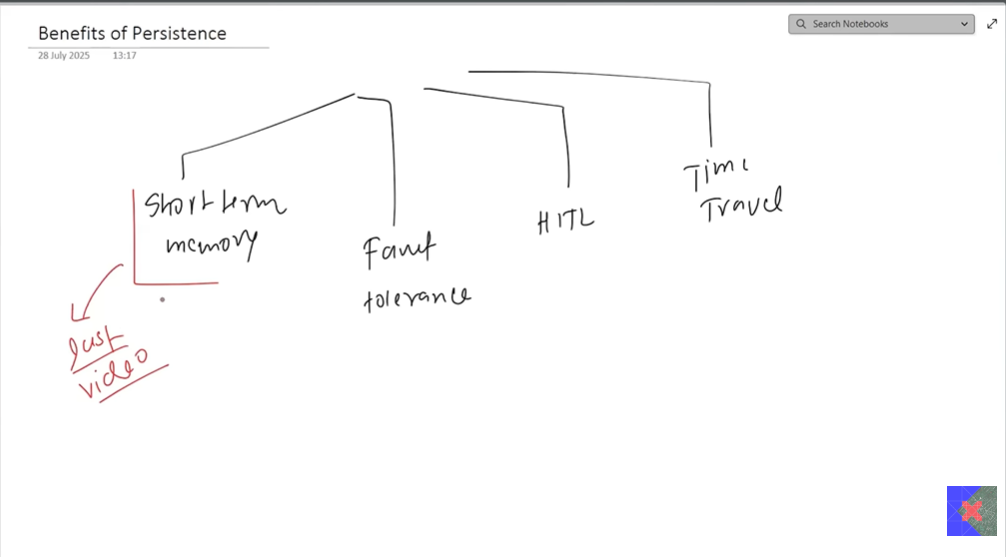

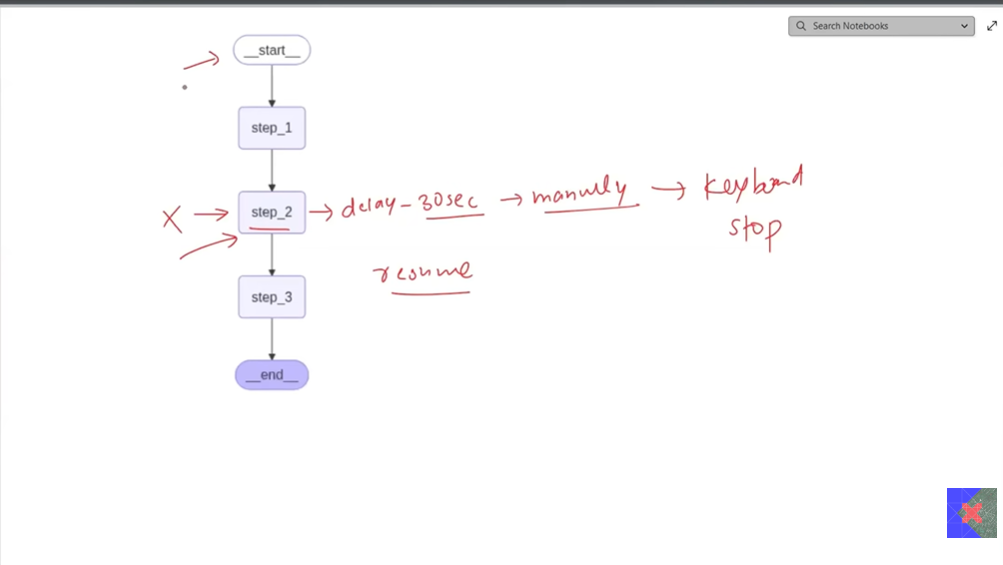

# Time travell

In [17]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the party? Because it heard there would be a great sauce-band playing!', 'explanation': 'This joke plays on the pun of "sauce band" sounding like "house band." The pasta goes to the party because it wants to see a great band playing, but instead of a regular band, there is a "sauce band" playing. This unexpected twist adds humor to the joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c5d-4af5-6465-8006-c7e5ee59663e'}}, metadata={'source': 'loop', 'step': 6, 'parents': {}}, created_at='2025-12-24T12:41:12.992470+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c5d-3d6c-6feb-8005-ffd6ec764cf3'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the party? Because it heard there would be a great sauce-band playing!', 'explanation': 'This joke plays on the ide

In [18]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0e0c57-994d-6500-8001-ab4e95d908b6"}})

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't handle the pressure!"}, next=('generate_explanation',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0e0c57-994d-6500-8001-ab4e95d908b6'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-12-24T12:38:40.146150+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c57-8ebd-6b10-8000-e4c847f3e2c9'}}, tasks=(PregelTask(id='e5f510ec-31b1-4ff3-fd93-f8b5b5265da4', name='generate_explanation', path=('__pregel_pull', 'generate_explanation'), error=None, interrupts=(), state=None, result={'explanation': 'This joke plays on the idea of a slice of pizza seeking therapy because it is feeling overwhelmed by the number of toppings it has. Toppings add weight and pressure to the slice, making it unable to handle the stress. The punchline is a play on words, using "handle 

In [ ]:
workflow.invoke({}, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0e0c57-994d-6500-8001-ab4e95d908b6"}})

{'topic': 'pizza',
 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't handle the pressure!",
 'explanation': 'This joke plays on the idea of a slice of pizza seeking therapy because it is overwhelmed by the number of toppings it has. In reality, pizza cannot experience stress, so the humor comes from the absurdity of the situation. The joke sets up a scenario where the slice of pizza is personified and seeking help for something that is typically trivial and lighthearted, making it a funny and light-hearted joke.'}

In [20]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't handle the pressure!", 'explanation': 'This joke plays on the idea of a slice of pizza seeking therapy because it is overwhelmed by the number of toppings it has. In reality, pizza cannot experience stress, so the humor comes from the absurdity of the situation. The joke sets up a scenario where the slice of pizza is personified and seeking help for something that is typically trivial and lighthearted, making it a funny and light-hearted joke.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0d45-a737-650e-8002-30d5f0d42634'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-24T14:25:10.368999+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c57-994d-6500-8001-ab4e95d908b6'}}, tasks=(), interrupts=()),
 StateSnapshot(

# Updating State

In [21]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0e0c57-8ebd-6b0f-bfff-1cb64b827ec8", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0e0d4d-f2c4-62a1-8000-7fac4a660a90'}}

In [22]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0d4d-f2c4-62a1-8000-7fac4a660a90'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-12-24T14:28:53.039376+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0c57-8ebd-6b0f-bfff-1cb64b827ec8'}}, tasks=(PregelTask(id='2058acc9-6011-9c2c-e917-2d51a097546d', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the slice of pizza go to the therapist? Because it had too many toppings and couldn't handle the pressure!", 'explanation': 'This joke plays on the idea of a slice of pizza seeking therapy because it is overwhelmed by the number of toppings it has. In reality, pizza cannot experience stress, so the humor comes from the a

In [ ]:
workflow.invoke({}, config={"configurable": {"thread_id": "1", "checkpoint_id": "1f0e0d4d-f2c4-62a1-8000-7fac4a660a90"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to the party? \nBecause it wanted to be the life of the samosa-tion!',
 'explanation': 'This joke playfully uses wordplay and a pun to create humor. The samosa, a popular South Asian snack, is said to go to a party because it wants to be the "life of the samosa-tion," a play on the phrase "life of the party." The joke combines the idea of the samosa being the center of attention at the party with a clever pun on its own name, resulting in a witty and lighthearted punchline.'}

In [24]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to the party? \nBecause it wanted to be the life of the samosa-tion!', 'explanation': 'This joke playfully uses wordplay and a pun to create humor. The samosa, a popular South Asian snack, is said to go to a party because it wants to be the "life of the samosa-tion," a play on the phrase "life of the party." The joke combines the idea of the samosa being the center of attention at the party with a clever pun on its own name, resulting in a witty and lighthearted punchline.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0d51-e69c-610d-8002-74d0a9d95010'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-24T14:30:39.138842+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e0d51-d02a-6d90-8001-41e8c056e527'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'samosa', 'joke': 'Why d

In [25]:
# Fault Tolerance

In [1]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [2]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [3]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("Step 3 executed")
    return {"done": True}

In [4]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

# in jupyternotebook no stop manually so do ggogle colab

In [ ]:
try:
    print("Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("Kernel manually interrupted (crash simulated).")

Running graph: Please manually interrupt during Step 2...
Step 1 executed
Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


In [1]:
# 6. Re-run to show fault-tolerant resume
print("\nRe-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
print("\nFinal State:", final_state)


Re-running the graph to demonstrate fault tolerance...


NameError: name 'graph' is not defined

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))